In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
%matplotlib inline


In [2]:
def plot_images(images, grey):
    fig = plt.figure()
    for i in range(min(9, len(images))):
        fig.add_subplot(3, 3, i+1)
        if grey:
            plt.imshow(images[i], cmap='gray')
        else:
            plt.imshow(images[i]) 
    plt.show() 

5 17
19 32
33 46
48 57
65 71
97 104
106 116


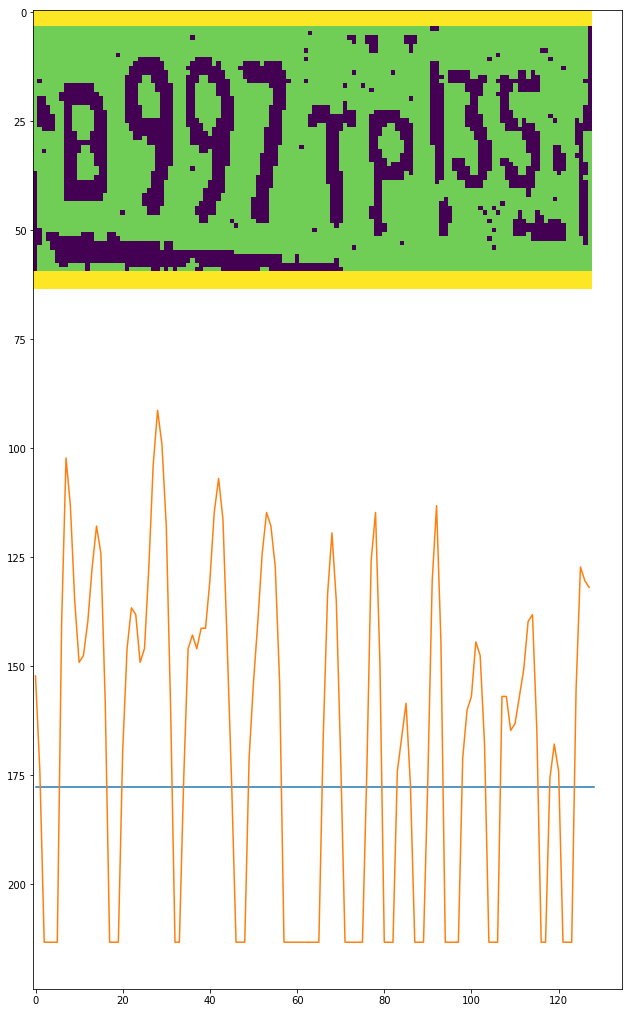

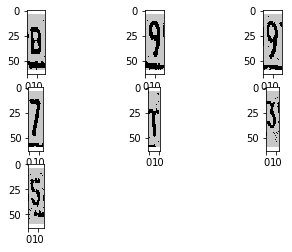

In [58]:
img=cv2.imread('/mnt/misk/misk/lplate/data/data_rt/12_1405_B997TP35.jpg', cv2.IMREAD_GRAYSCALE)
MEAN_SIZE = 2
plt.figure(figsize=(15,18))
img = cv2.adaptiveThreshold(img, 200, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 9, 3)
img[img.shape[0] - 4: img.shape[0], 0:img.shape[1]] = 255
img[0: 4, 0:img.shape[1]] = 255
imgplot = plt.imshow(img)
mn = []
imgs = []
for i in range(0, img.shape[1]):
    mn.append(np.mean(img[:, i:i + MEAN_SIZE]))
    i += MEAN_SIZE
md = np.median(mn)*1.1
indx = np.where(mn >= md)
mn = np.array(mn)
mn[indx] = md*1.2
indx = np.where(mn >= md*1.1)
plt.plot([0, img.shape[1]], [md, md])
plt.plot(mn)
if len(indx) > 0:
    indx = indx[0]
if indx[0] > (2*MEAN_SIZE):
    np.insert(indx, 0, MEAN_SIZE)
for i in range(1, len(indx)):
    if (indx[i] - indx[i-1]) < 6:
        continue
    print(indx[i-1], indx[i])
    imgs.append(np.copy(img[0:img.shape[0], indx[i-1]-2:indx[i]+4]))
plot_images(imgs, True)
mn = np.array(mn)